# CIFAR-100 DNLL lambda_reg summary

Load the sweep JSON and plot mean test accuracy with a ±2 std band.

In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

plt.style.use("ggplot")


In [2]:
data_path = Path("fashionmnist_dnll_lambda_reg_sweep.json")
payload = json.loads(data_path.read_text())
lambda_regs = payload["lambda_regs"]
results = payload["results"]


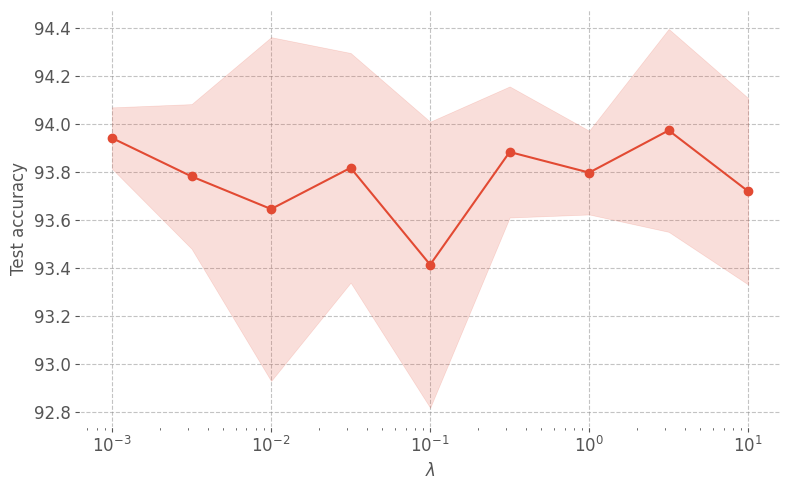

In [3]:
mean_acc = [results[str(l)]["final_test_mean"]*100 for l in lambda_regs]
std_2 = [2 * results[str(l)]["final_test_std"]*100 for l in lambda_regs]
lower = [m - s for m, s in zip(mean_acc, std_2)]
upper = [m + s for m, s in zip(mean_acc, std_2)]

plt.figure(figsize=(8, 5))
plt.xscale("log")
plt.fill_between(lambda_regs, lower, upper, color="C0", alpha=0.18)
plt.plot(lambda_regs, mean_acc, marker="o", color="C0", linewidth=1.5)

ax = plt.gca()
ax.set_facecolor("none")
plt.gcf().patch.set_alpha(0)
ax.grid(True, color="#888888", alpha=0.5, linestyle="--", linewidth=0.8)

plt.xlabel(r"$\lambda$")
plt.ylabel("Test accuracy")
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig('fmnist_lambda_vs_acc.png', dpi=600)


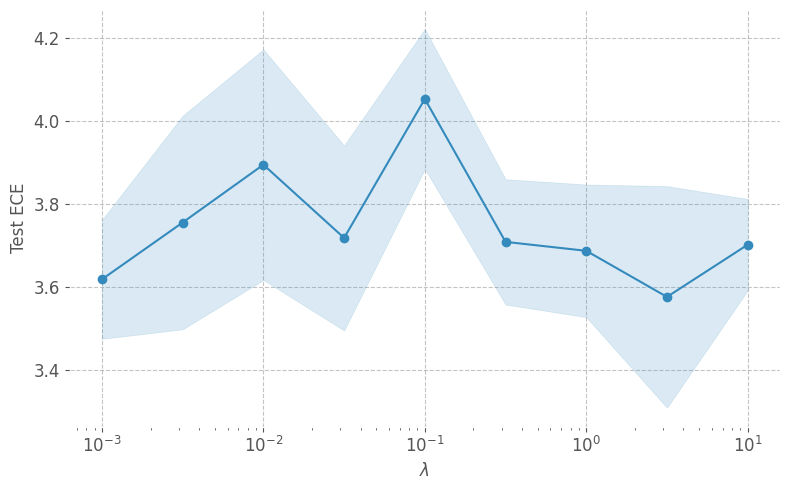

In [4]:
mean_ece = [results[str(l)]["final_test_ece_mean"]*100 for l in lambda_regs]
std_ece = [results[str(l)]["final_test_ece_std"]*100 for l in lambda_regs]
lower = [m - s for m, s in zip(mean_ece, std_ece)]
upper = [m + s for m, s in zip(mean_ece, std_ece)]

plt.figure(figsize=(8, 5))
plt.xscale("log")
plt.fill_between(lambda_regs, lower, upper, color="C1", alpha=0.18)
plt.plot(lambda_regs, mean_ece, marker="o", color="C1", linewidth=1.5)

ax = plt.gca()
ax.set_facecolor("none")
plt.gcf().patch.set_alpha(0)
ax.grid(True, color="#888888", alpha=0.5, linestyle="--", linewidth=0.8)

plt.xlabel(r"$\lambda$")
plt.ylabel("Test ECE")
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig('fmnist_lambda_vs_ece.png', dpi=600)


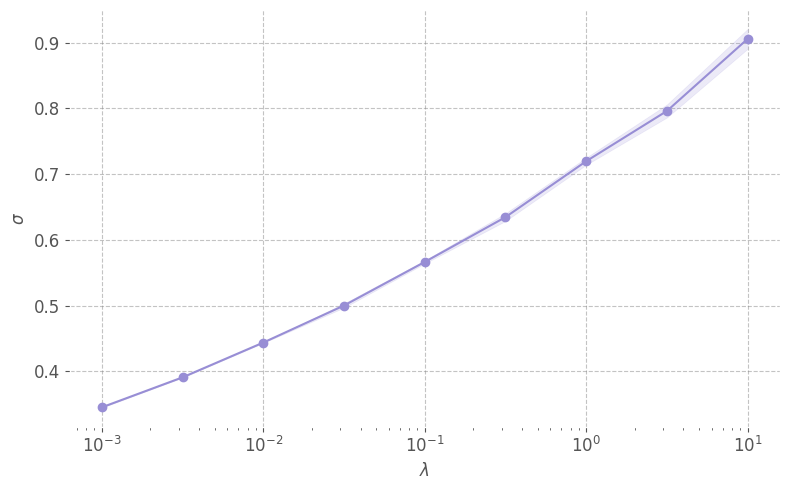

In [5]:
mean_sigma = [results[str(l)]["final_sigma_mean"] for l in lambda_regs]
std_sigma = [results[str(l)]["final_sigma_std"] for l in lambda_regs]
lower = [m - s for m, s in zip(mean_sigma, std_sigma)]
upper = [m + s for m, s in zip(mean_sigma, std_sigma)]

plt.figure(figsize=(8, 5))
plt.xscale("log")
plt.fill_between(lambda_regs, lower, upper, color="C2", alpha=0.18)
plt.plot(lambda_regs, mean_sigma, marker="o", color="C2", linewidth=1.5)

ax = plt.gca()
ax.set_facecolor("none")
plt.gcf().patch.set_alpha(0)
ax.grid(True, color="#888888", alpha=0.5, linestyle="--", linewidth=0.8)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\sigma$")
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.savefig('fmnist_lambda_vs_sigma.png', dpi=600)
